<a href="https://colab.research.google.com/github/mainarel/-Numerical_methods/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

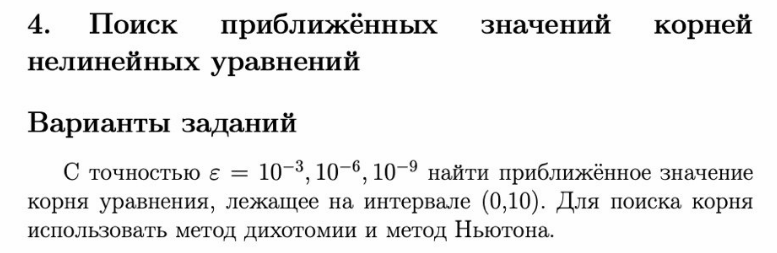

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *


epsar = [0.001, 10**(-6), 10**(-9)]
xtrue = 3.56508236916286
a = 0
b = 10
eps = 0.001


def func(x):
 return x*np.arctan(x) + (x/2)*np.cos(x) - 3

def funcdiff(x):
  return ( -x*np.sin(x)/2 + x/(np.power(x,2)+1) + np.cos(x)/2 + np.arctan(x)  )

def Rate(Xn):
    R = []
    if len(Xn) > 3:
        for k in range(3, len(Xn)):
            R.append(np.log(abs(Xn[k] - Xn[k - 1]) / abs(Xn[k - 1] - Xn[k - 2])) / np.log(
                abs(Xn[k - 1] - Xn[k - 2]) / abs(Xn[k - 2] - Xn[k - 3])))
    else:
        return None
    return R[-1]

def dichotomy(a, b, eps, f):
    Xn = [a,b]
    count = 0
    if func(a) == 0: 
        return a, count
    elif func(b) == 0:
        return b, count
    else:
        while (b - a) > eps:
            x = (a + b) / 2
            Xn.append(x)
            if func(x)*func(b) <= 0:
                a = x
            else:
                b = x
            count += 1
        return x, count, Rate(Xn)

def newton(a, b, eps, f, fdif):
    x0 = (a+b)/2
    Xn = [x0]
    count = 0
    if func(a) == 0: 
        return a
    elif func(b) == 0:
        return b
    else:
        x = (a + b) / 2
        while abs(f(x)) > eps:
            x = x - f(x) / fdif(x)
            count += 1
            Xn.append(x)
        return x, count, Rate(Xn)

def chord(left, right, eps, f):
    Xn = [right, left]
    count = 0
    while abs(f(right)) > eps:
        count += 1
        left, right = right, right - f(right) * (right - left) / (f(right) - f(left))
        Xn.append(right)
    return right, count, Rate(Xn)


def check():
  method_range = ['dichotomy','newton','chord' ]
  count_of_iter_d = []
  count_of_iter_n = []
  count_of_iter_c = []
  iter_counts = [count_of_iter_d,count_of_iter_n, count_of_iter_c]
  
  
  for current_eps in epsar:
   iter_counts[0].append( dichotomy(a, b, current_eps, func)[1] )
   iter_counts[1].append (newton(a,b, current_eps, func, funcdiff)[1])
   iter_counts[2].append (chord((a + b) / 2, (a + b) / 2 + 2 * current_eps, current_eps, func)[1])
   rates_range = []

  for i in range (0,3):
    #  dd = plt.figure(i)
    #  ax = dd.add_subplot(111)
    #  ax.set_xlabel('eps')
    #  ax.set_ylabel("count_of_iter")
    #  plt.title(method_range[i])
    #  plt.grid()
     
    #  plt.scatter (epsar, iter_counts[i], label = "Количество итераций от eps", color = 'black')
    #  plt.show()  
     print ('Метод -', method_range[i] , '\nКоличество итераций -', iter_counts[i], 'при eps =', epsar)

     if i == 0:
       print  ('Полученные значения:', [ dichotomy(a, b, eps, func)[0]   for cur in epsar])
       print('')
     elif i==1:
       print ('Полученные значения:',[ newton(a, b, cur, func, funcdiff)[0]   for cur in epsar] )
       print('')
     elif i==2: 
       print ('Полученные значения:', [chord((a + b) / 2, (a + b) / 2 + 2 * cur, cur, func)[0] for cur in epsar])
       print('')





  print('')
  print("Скорость сходмости dichotomy", [ dichotomy(a, b, eps, func)[2]   for cur in epsar] )
  print("Скорость сходмости newton", [ newton(a, b, cur, func, funcdiff)[2]   for cur in epsar] )
  print("Скорость сходмости chord", [chord((a + b) / 2, (a + b) / 2 + 2 * cur, cur, func)[2] for cur in epsar]  )

check()


Метод - dichotomy 
Количество итераций - [14, 24, 34] при eps = [0.001, 1e-06, 1e-09]
Полученные значения: [3.5650634765625, 3.5650634765625, 3.5650634765625]

Метод - newton 
Количество итераций - [4, 5, 5] при eps = [0.001, 1e-06, 1e-09]
Полученные значения: [3.565082928358871, 3.565082369163032, 3.565082369163032]

Метод - chord 
Количество итераций - [5, 6, 7] при eps = [0.001, 1e-06, 1e-09]
Полученные значения: [3.56509338223546, 3.5650823760302592, 3.5650823691628997]


Скорость сходмости dichotomy [1.0, 1.0, 1.0]
Скорость сходмости newton [1.9890122613831271, 2.001860361870903, 2.001860361870903]
Скорость сходмости chord [1.4816328874732063, 1.70634945480849, 1.5981820773845257]
